## In this notebook, we'll apply the PyTorch Workflow from the past couple of sections to computer vision (the art of teaching a computer to see).

In [4]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torch.__version__, torchvision.__version__

('2.6.0+cu124', '0.21.0+cu124')

In [5]:
# Setup MNIST training data
train_data0 = datasets.MNIST(
    root = ".",              # where to download data to
    train = True,            # get training data
    download = True,         # download data if not on disk
    transform = ToTensor()   # turn PIL image data into tensors
#    transform=transforms.ToTensor()  # other way to do it
)

# Setup MNIST testing data
test_data0 = datasets.MNIST(
    root = ".",
    train = False,           # get testing data
    transform = ToTensor()
)

train_data0, test_data0

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [6]:
len(train_data0), len(test_data0)

(60000, 10000)

In [7]:
# Data is in tuple format (image, label)
img0 = train_data0[0][0]
label0 = train_data0[0][1]
print(f"Image: {img0}")
print(f"Label: {label0}")

Image: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
# Check out the shapes of our data
print(f"Image shape: {img0.shape} -> [color_channels, height, width] (CHW)")
print(f"Label: {label0} -> no shape, due to being integer")
"""
        Note: There are two main agreed upon ways for representing images in machine learning:,
        1. Color channels first: [color_channels, height, width] (CHW) -> PyTorch default (as of April 2022),
        2. Color channels last: [height, width, color_channels] (HWC) -> Matplotlib/TensorFlow default (as of April 2022)
"""

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width] (CHW)
Label: 5 -> no shape, due to being integer


'\n        Note: There are two main agreed upon ways for representing images in machine learning:,\n        1. Color channels first: [color_channels, height, width] (CHW) -> PyTorch default (as of April 2022),\n        2. Color channels last: [height, width, color_channels] (HWC) -> Matplotlib/TensorFlow default (as of April 2022)\n'

In [9]:
# Get the class names from the dataset
class_names0 = train_data0.classes
class_names0

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


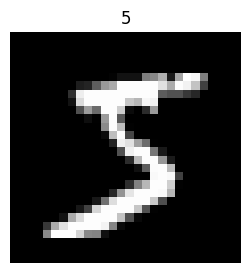

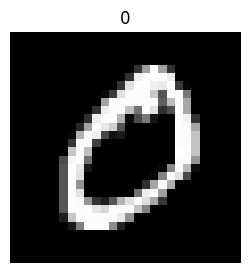

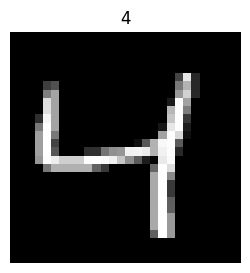

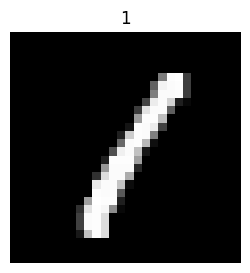

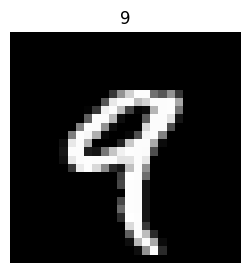

In [10]:
## 6. Visualize at least 5 different samples of the MNIST training dataset.
for i in range(5):
  img0 = train_data0[i][0]
  print(img0.shape)
  img0_squeeze = img0.squeeze()
  print(img0_squeeze.shape)
  label0 = train_data0[i][1]
  plt.figure(figsize=(3, 3))
  plt.imshow(img0_squeeze, cmap="gray")
  plt.title(label0)
  plt.axis(False)

In [11]:
# Setup training data
train_data = datasets.FashionMNIST(
    root = "data",           # where to download data to
    train = True,            # get training data
    download = True,         # download data if not on disk
    transform = ToTensor(),  # turn PIL image data into tensors
    target_transform = None  # don't need to transform labels
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,           # get testing data
    transform = ToTensor(),
    target_transform = None
)

# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [13]:
image.shape

torch.Size([1, 28, 28])

In [14]:
# Number of samples
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [15]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, '9')

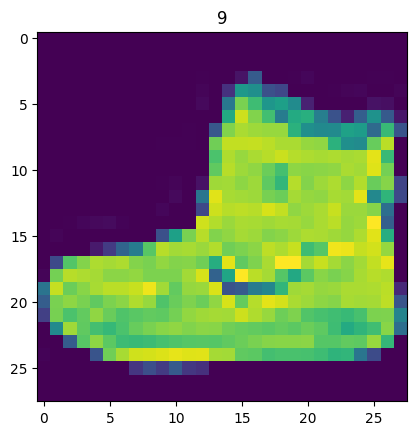

In [16]:
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Pullover')

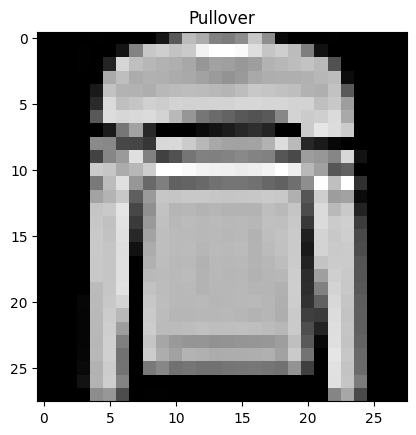

In [17]:
image5, label5 = train_data[5]
plt.imshow(image5.squeeze(), cmap="gray")
plt.title(class_names[label5])

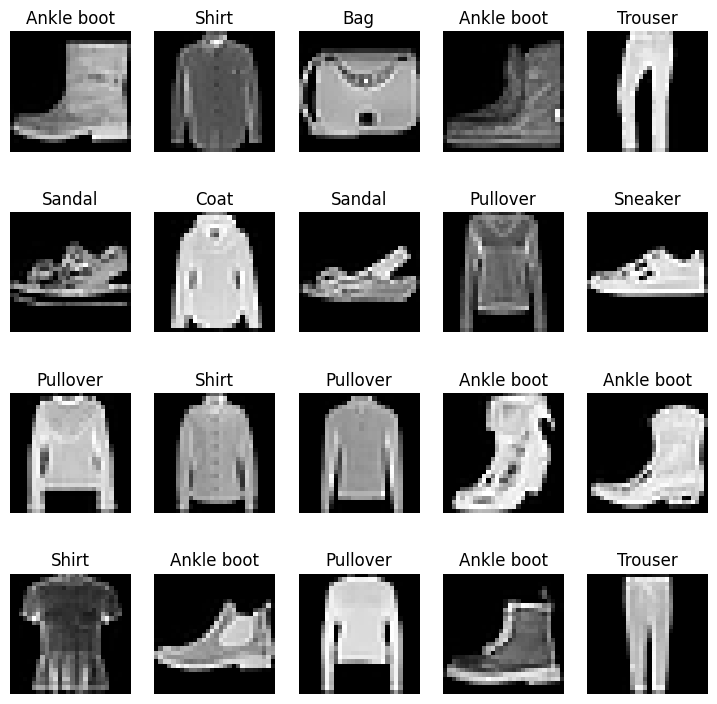

In [18]:
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 5
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, lbl = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")

  plt.title(class_names[lbl])
  plt.axis(False)

In [19]:
# Turn the MNIST train and test datasets into dataloaders
from torch.utils.data import DataLoader

# Turn datasets into batches
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,  # of samples per batch
                              shuffle = True)           # shuffle data every epoch
test_dataloader = DataLoader(test_data,
                              batch_size = BATCH_SIZE,
                              shuffle = False)

#train_dataloader, test_dataloader, len(train_dataloader), len(test_dataloader)
print(train_dataloader, test_dataloader)
print(f"{len(train_dataloader)} batches of 32")
print(f"{len(test_dataloader)} batches of 32")

<torch.utils.data.dataloader.DataLoader object at 0x7ca9c9b85b90> <torch.utils.data.dataloader.DataLoader object at 0x7ca9c9fe3e10>
1875 batches of 32
313 batches of 32


In [20]:
# See what's in a training batch
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

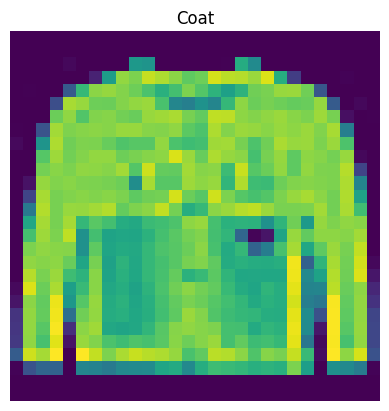

In [21]:
# Plot a sample from the batch
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, lbl = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze())
plt.title(class_names[lbl])
plt.axis("Off")  # same as plt.axis(False)

In [22]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [23]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  # Model architecture from TinyVGG
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,  # size of the square going over the image
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)  # default stride same as kernel size
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        # The in_features shape comes from/because each layer of our network
        # compresses and changes the shape of our input data.
        nn.Linear(in_features = hidden_units * 7 * 7,
                  out_features = output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block1(x)
    x = self.block2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [24]:
# Training and Testing functions
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_accuracy = 0, 0
  model.to(device)
  for batch, (X, y) in enumerate(dataloader):
    # Send to GPU
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred = model(X)
    # Calc loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_accuracy += accuracy_fn(y_pred.argmax(dim = 1), y)  # from logits to pred labels
    # Optimizer zero grad
    optimizer.zero_grad()
    # Loss backward
    loss.backward()
    # Optimizer step
    optimizer.step()

  # Calc loss and acc per epoch
  train_loss /= len(dataloader)
  train_accuracy /= len(dataloader)
  print(f"Train loss: {train_loss} | Train accuracy: {train_accuracy}")

def test_step(model: nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    #for X, y in dataloader:
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      # Forward pass
      test_pred = model(X)
      # Calc loss and acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(test_pred.argmax(dim = 1), y)
    # Adjust metrics and print
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f"Test loss: {test_loss} | Test accuracy: {test_acc}")

In [25]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)
# Setup accuracy_fn
# Python Package Index (PyPI)
try:
  import torchmetrics
  print(f"Already installed, torchmetrics version: {torchmetrics.__version__}")
except:
  !pip install -q torchmetrics  # -q, --quiet Give less output
  import torchmetrics
#  from torchmetrics import Accuracy

accuracy_fn = torchmetrics.Accuracy(task = "multiclass", num_classes = len(class_names)).to(device)
#    acc_fn = Accuracy(task = 'multiclass', num_classes=len(fashion_mnist_class_names)).to(device)

Already installed, torchmetrics version: 1.7.3


In [26]:
import torch
torch.manual_seed(42)

# Import tqdm for progress bar
from tqdm.auto import tqdm
# Measure time
from timeit import default_timer as timer
train_time_start = timer()

# Train and Test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------")
  train_step(model=model_2,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end = timer()
total_train_time = train_time_end - train_time_start
print(f"Train time on {device}: {(train_time_end - train_time_start):.3f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------
Train loss: 0.596924901008606 | Train accuracy: 0.7847166657447815
Test loss: 0.38436147570610046 | Test accuracy: 0.8622204065322876
Epoch: 1
------------
Train loss: 0.35551467537879944 | Train accuracy: 0.8724166750907898
Test loss: 0.35254165530204773 | Test accuracy: 0.8689097166061401
Epoch: 2
------------
Train loss: 0.31819745898246765 | Train accuracy: 0.8858166933059692
Test loss: 0.3265734612941742 | Test accuracy: 0.8828873634338379
Train time on cuda: 43.832 seconds


In [27]:
print(f"Train time on {device}: {total_train_time:.3f} seconds")
print(f"Train time on {device}: {train_time_end - train_time_start:.3f} seconds")

Train time on cuda: 43.832 seconds
Train time on cuda: 43.832 seconds


In [28]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare sample
      sample = torch.unsqueeze(sample, dim=0).to(device)
      # Forward pass (model outputs raw logit)
      pred_logit = model(sample)
      # Get prediction probability (logit to pred_prob)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      # Use CPU for pred_prob
      pred_probs.append(pred_prob.cpu())

    # Stack pred_probs to turn list into tensor
    return torch.stack(pred_probs)

In [29]:
import random
random.seed(42)
test_samples, test_labels = [], []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [30]:
# Make predictions on test samples with model 2
pred_probs = make_predictions(model=model_2, data=test_samples)

# View first n prediction probabilities list
pred_probs[:5]

tensor([[3.8897e-07, 4.2888e-06, 1.1636e-07, 2.1779e-08, 7.8012e-08, 9.9915e-01,
         8.3262e-07, 2.6733e-05, 1.4100e-04, 6.8025e-04],
        [1.3880e-01, 7.1731e-01, 1.1404e-03, 1.0925e-01, 1.1656e-02, 9.8155e-05,
         2.1442e-02, 1.4748e-04, 1.8972e-05, 1.3226e-04],
        [3.1324e-05, 2.0253e-06, 1.2041e-05, 7.7752e-06, 1.4142e-06, 1.6965e-03,
         1.9442e-05, 7.3070e-01, 1.0807e-03, 2.6645e-01],
        [1.6236e-03, 6.7611e-05, 7.7264e-02, 2.2490e-04, 9.1987e-01, 6.4190e-07,
         9.3692e-04, 2.2561e-06, 7.5335e-06, 2.1849e-06],
        [2.8115e-02, 1.5412e-05, 7.0982e-05, 9.5926e-01, 1.9110e-04, 7.3027e-07,
         1.2292e-02, 4.9694e-06, 4.8695e-05, 5.4146e-06]])

In [31]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [32]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

In [33]:
# See if torchmetrics exists, if not, install it
try:
  import torchmetrics, mlxtend
  assert int(mlxtend.__version__.split(".")[1]) >= 19
  print(f"Already installed, mlxtend version: {mlxtend.__version__}")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

Already installed, mlxtend version: 0.23.4


In [34]:
# Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making Predictions"):
    # Send data and targets to active device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits to pred probabilities to pred labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)  # tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])
    #y_pred = torch.argmax(torch.softmax(y_logit, dim=1), dim=1)    # tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])
    # Put predictions on cpu for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

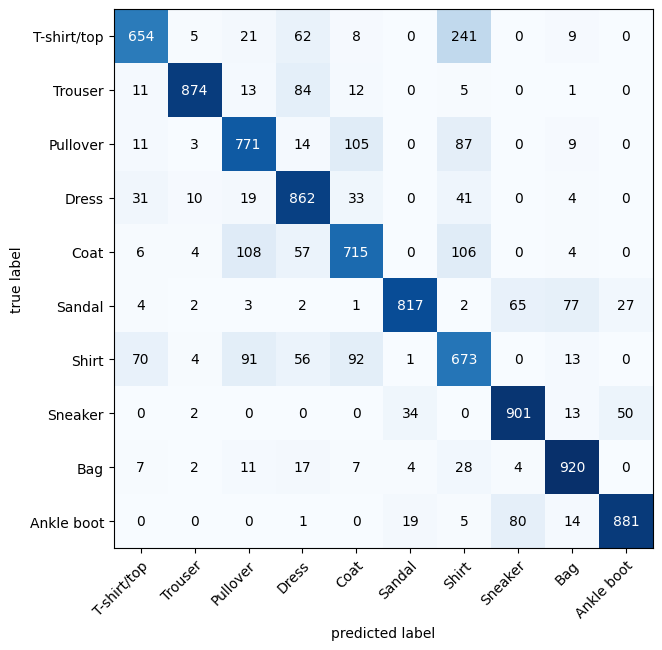

In [35]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance and compare predictions to targets
cm = ConfusionMatrix(num_classes=len(class_names),
                     task = "multiclass")
cm_tensor = cm(preds = y_pred_tensor,
               target = test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = cm_tensor.numpy(),
    class_names = class_names,
    figsize = (10, 7)
);

In [36]:
## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter
#      settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [37]:
conv_layer = nn.Conv2d(in_channels =3,
                       out_channels = 64,
                       kernel_size = 3,
                       stride = 2,
                       padding = 1)
print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


In [38]:
# kernel_size has to be > 0
# kernel_size = 1  Random tensor through conv layer shape: torch.Size([1, 64, 33, 33])
# kernel_size = 5  Random tensor through conv layer shape: torch.Size([1, 64, 31, 31])
# kernel_size = 9  Random tensor through conv layer shape: torch.Size([1, 64, 29, 29])
# kernel_size = 15  Random tensor through conv layer shape: torch.Size([1, 64, 26, 26])
# kernel_size = 49  Random tensor through conv layer shape: torch.Size([1, 64, 9, 9])
# kernel_size = 64  Random tensor through conv layer shape: torch.Size([1, 64, 2, 2])
# kernel_size = 66  Random tensor through conv layer shape: torch.Size([1, 64, 1, 1])
# 67 errors - RuntimeError: Calculated padded input size per channel: (66 x 66). Kernel size: (67 x 67). Kernel size can't be greater than actual input size
conv_layer = nn.Conv2d(in_channels =3,
                       out_channels = 64,
                       kernel_size = 66,
                       stride = 2,
                       padding = 1)
print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 1, 1])


In [39]:
# Get wrong prediction indexes
wrong_pred_indexes = [i for i in range(len(test_labels)) if test_labels[i] != pred_classes[i]]
wrong_pred_indexes[:10]

[]

In [40]:
test_labels, pred_classes, test_data.targets, y_pred_tensor

([5, 1, 7, 4, 3, 0, 4, 7, 1],
 tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]),
 tensor([9, 2, 1,  ..., 8, 1, 5]),
 tensor([9, 2, 1,  ..., 8, 1, 8]))

In [41]:
import numpy as np
wrong_pred_indexes = np.where(y_pred_tensor != test_data.targets)[0]
wrong_pred_indexes[:10]

array([12, 15, 17, 23, 25, 49, 50, 53, 65, 66])

In [42]:
len(wrong_pred_indexes), len(test_data.targets), len(y_pred_tensor)

(1932, 10000, 10000)

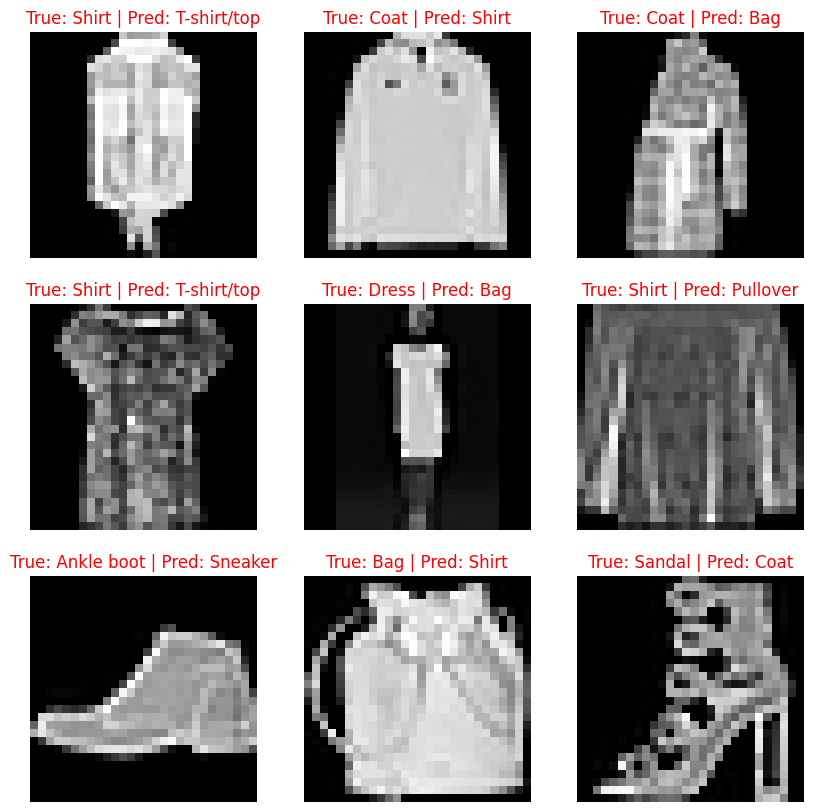

In [43]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k = 9)
plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = class_names[test_data.targets[idx]]  #[test_data[idx][1]]
  pred_label = class_names[y_pred_tensor[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(test_data.data[idx].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False)

# From the look of some of these predictions, the model is getting about as confused as I would...
# For example it predicts Sneaker instead of Sandal when it could have easily been a Sneaker.
# The same goes for the confusion between the classes of T-shirt/top and Shirt, many of the examples here look similar.

In [44]:
from google.colab import runtime
runtime.unassign()